In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [15]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [18]:
# Create our session (link) from Python to the DB:
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set:
engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23',)]

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results: 
# Starting from the most recent data point in the database:
# Calculate the date one year from the last date in data set:
# Perform a query to retrieve the data and precipitation scores:
precipt_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2016-08-24").\
    filter(measurement.date <= "2017-08-23").all()



# Save the query results as a Pandas DataFrame and set the index to the date column; rename
precipt_df = pd.DataFrame(precipt_data).set_index('date')
precipt_df=precipt_df.rename(columns={'prcp':'precipitation'})

# Sort the dataframe by date:
precipt_df=precipt_df.sort_values(by='date').dropna()

#Show the data:
precipt_df.head()






,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


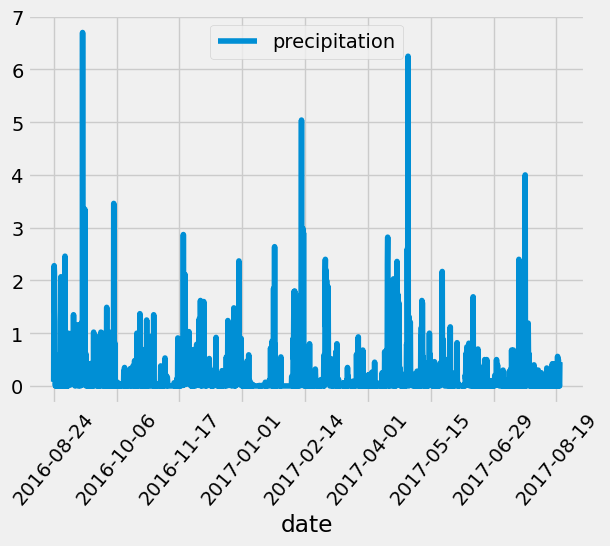

In [28]:
# Use Pandas Plotting with Matplotlib to plot the data:
precipt_df.plot(rot=50)
plt.savefig("Precipitation analysis")
plt.show()

In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data:
precipt_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.id).count() 
print(f'There are {station_count} stations available in this dateset.')

There are 9 stations available in this dateset.


In [33]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature
#Use:'USC00519281' has the most row 
station_number = 'USC00519281'
session.query(func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station == station_number).all()

[(54.0, 85.0, 71.66378066378067)]

In [41]:
# Using the most active station id:
station_highest_obs = station_activity[0][0]

results = session.query(measurement.date, measurement.tobs).\
                        filter(measurement.date >= "2016-08-24").\
                        filter(measurement.date <= "2017-08-23").\
                        filter(measurement.station == station_highest_obs).all()
# Make into dataframe:
results_df = pd.DataFrame(results)



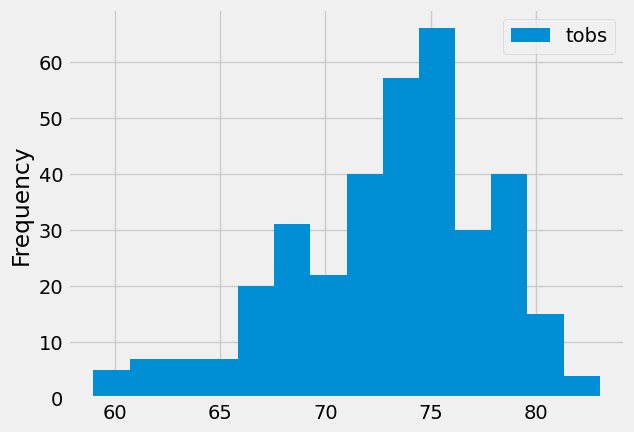

In [45]:
# Histogram: 
results_df.plot.hist(bins=14)
plt.savefig("Most active Station")

# Close session

In [ ]:
# Close Session
session.close()